<a href="https://colab.research.google.com/github/Najlalala007/Digital-Image-Processing/blob/main/Digital_Watermarking_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

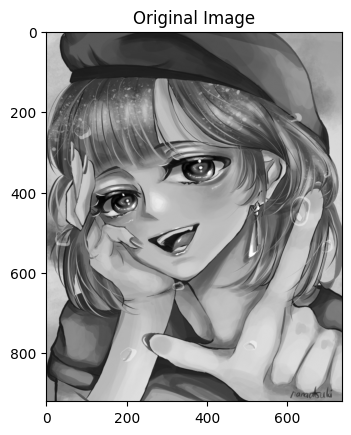

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

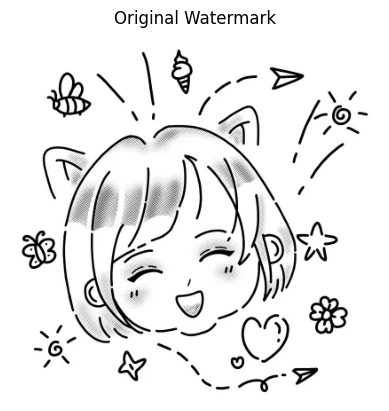

In [11]:
# Load the watermark image
watermark = cv2.imread('watermark1.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Original Watermark')
plt.axis('off')
plt.show()

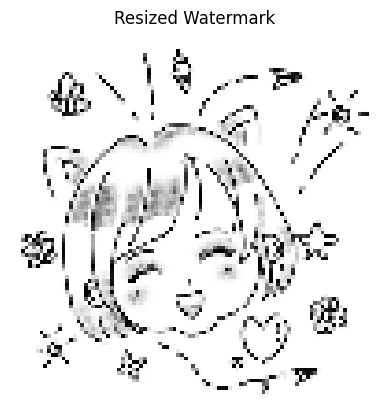

In [16]:
# Resize the watermark to desired dimensions
desired_width = 100  # Replace with your desired width
desired_height = 100  # Replace with your desired height
resized_watermark = cv2.resize(watermark, (desired_width, desired_height))

# Display the resized watermark
plt.imshow(cv2.cvtColor(resized_watermark, cv2.COLOR_BGR2RGB))
plt.title('Resized Watermark')
plt.axis('off')
plt.show()

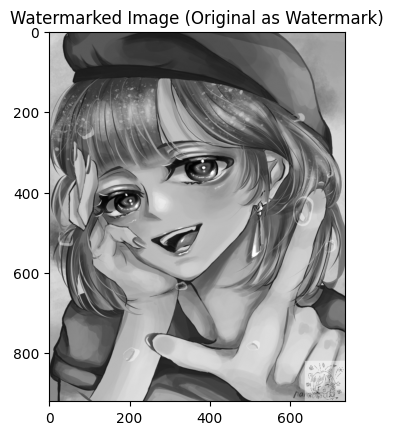

In [17]:
# Create a copy of the original image to embed the watermark
watermarked_image = image.copy()

# Define the position to place the watermark (bottom-right corner)
# Use resized_watermark's shape for offset calculation
x_offset = image.shape[1] - resized_watermark.shape[1]
y_offset = image.shape[0] - resized_watermark.shape[0]

# Convert the resized watermark to grayscale to match the original image
resized_watermark_gray = cv2.cvtColor(resized_watermark, cv2.COLOR_BGR2GRAY)

# Embed the watermark with transparency
alpha = 0.5  # Transparency factor
watermarked_image[y_offset:, x_offset:] = cv2.addWeighted(
    watermarked_image[y_offset:, x_offset:], 1 - alpha,
    resized_watermark_gray, alpha,  # Use the grayscale resized watermark
    0
)

# Display the watermarked image
plt.imshow(watermarked_image, cmap='gray')
plt.title('Watermarked Image (Original as Watermark)')
plt.show()

In [18]:
# Save the resulting watermarked image as a new JPG file
output_filename = 'watermarked_image.jpg'
cv2.imwrite(output_filename, watermarked_image)

print(f"Watermarked image saved as: {output_filename}")

Watermarked image saved as: watermarked_image.jpg
